# Compress Image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bird_im = plt.imread('bird.jpg')
bird_im

array([[[ 94, 110,  99],
        [ 94, 110,  99],
        [ 94, 110,  99],
        ...,
        [109, 120, 106],
        [109, 120, 106],
        [110, 121, 107]],

       [[ 94, 110,  99],
        [ 94, 110,  99],
        [ 94, 110,  99],
        ...,
        [109, 119, 108],
        [109, 119, 108],
        [110, 120, 109]],

       [[ 94, 110,  99],
        [ 94, 110,  99],
        [ 94, 110,  99],
        ...,
        [109, 119, 110],
        [109, 119, 110],
        [110, 120, 111]],

       ...,

       [[100, 106, 106],
        [ 94, 104, 103],
        [ 96, 106, 105],
        ...,
        [126, 121,  92],
        [126, 121,  92],
        [126, 121,  92]],

       [[ 99, 105, 103],
        [ 96, 106, 105],
        [ 93, 105, 105],
        ...,
        [126, 121,  92],
        [126, 121,  92],
        [126, 121,  92]],

       [[ 95, 101,  99],
        [ 99, 109, 108],
        [ 93, 105, 105],
        ...,
        [126, 121,  92],
        [126, 121,  92],
        [126, 121,  92]]

In [3]:
bird_im.shape

(360, 509, 3)

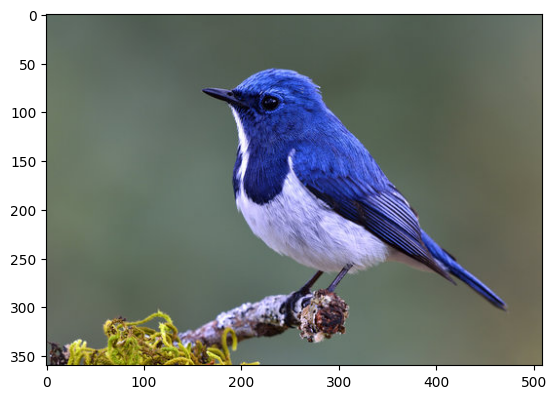

In [4]:
plt.imshow(bird_im)

In [5]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(bird_im, (bird_im.shape[0] * bird_im.shape[1], 3)) # if the image is jpg

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(X_img)
y_pred = km.predict(X_img)

c:\Users\Z\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
pd.Series(y_pred).value_counts()

1    82292
4    68813
2    11430
3    10765
0     9940
Name: count, dtype: int64

In [8]:
km.cluster_centers_

array([[ 30.07184544,  30.20175086,  66.90128799],
       [106.72290474, 116.82172238, 101.38918256],
       [174.23790781, 173.34820257, 221.97017406],
       [ 58.48476686,  77.08368939, 180.26788036],
       [ 89.98100567,  97.73418108,  82.31222206]])

In [9]:
km.cluster_centers_.shape

(5, 3)

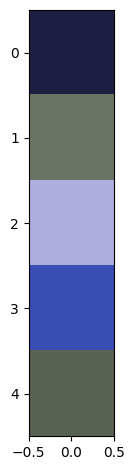

In [10]:
a = km.cluster_centers_.reshape(km.cluster_centers_.shape[0],1,3)# we have 16 colors we will use to compress  top k colors
plt.imshow(a.astype(np.int64)) 
plt.tight_layout()# plot top 16 color
plt.show()


In [11]:
X_recovered = km.cluster_centers_[y_pred, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, bird_im.shape) 

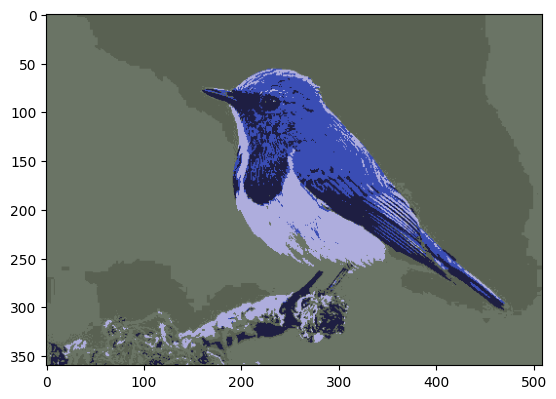

In [12]:
plt.imshow(X_recovered.astype(np.int64))
plt.savefig("test2.jpg")

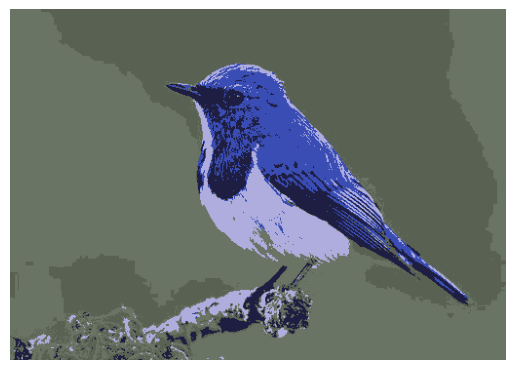

In [13]:
plt.imshow(X_recovered.astype(np.int64))
plt.axis('off')
plt.savefig("test2.jpg", transparent=True, bbox_inches='tight', pad_inches=0)

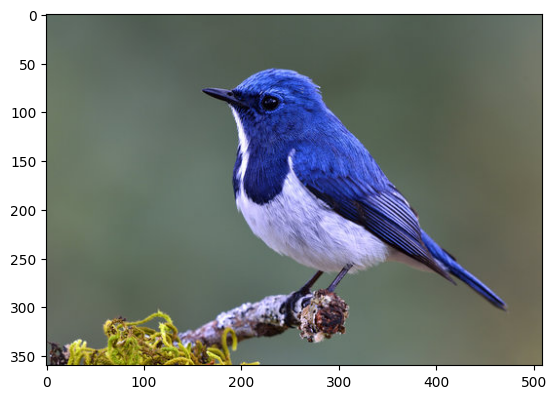

In [14]:
plt.imshow(bird_im)